In [156]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [246]:
import nltk

# Read Data

In [13]:
df = pickle.load(open('bbc_bitcoin.pkl', 'rb'))
df.published = pd.to_datetime(df.published)

In [35]:
df.to_csv('bbc_bitcoin.csv')

In [160]:
btc_prices = pd.read_csv('BTC_price_201305_201903.csv', header=None, index_col=0).fillna(method='ffill')
btc_prices.columns = ['PRICE']
btc_prices.index.name =  'DAY'
btc_prices.index = pd.to_datetime(btc_prices.index)

In [161]:
# log ret
btc_log_ret = np.log(btc_prices)
btc_log_ret = btc_log_ret.diff().fillna(0)

In [131]:
crix = pd.read_csv('crix.csv', index_col = 'date')
crix.index = pd.to_datetime(crix.index)

In [135]:
vcrix = pd.read_csv('vcrix.csv', usecols=[2,3],index_col = 'date')
vcrix.index = pd.to_datetime(vcrix.index)

# EDA

In [5]:
df.head()

,headline,hyperlink,published,query,source,content
0,Bitcoin mining ban considered by China's econo...,https://www.bbc.co.uk/news/technology-47867031,2019-04-09T11:30:37Z,"[bitcoin, , ]",bbc,Bitcoin creation has joined a list of activiti...
1,Binance exchange hackers steal bitcoins worth ...,https://www.bbc.co.uk/news/technology-48199375,2019-05-08T09:06:05Z,"[bitcoin, , ]",bbc,Hackers have stolen $41m (£31m) worth of Bitco...
2,A dress with 3D-printed petals and other tech ...,https://www.bbc.co.uk/news/technology-48220477,2019-05-09T23:04:05Z,"[bitcoin, , ]",bbc,BBC Click's Lara Lewington looks at some of th...
3,Bitcoin: Crypto investors 'think they can get ...,https://www.bbc.co.uk/news/business-47483068,2019-03-07T15:17:03Z,"[bitcoin, , ]",bbc,Investors influenced by friends and social med...
4,Siberia's Bitcoin Babushkas,https://www.bbc.co.uk/news/world-europe-46704126,2018-12-29T09:21:22Z,"[bitcoin, , ]",bbc,Mining for cryptocurrency on the edge of Russia.


In [38]:
articles_per_day = df.groupby([pd.Grouper(key='published', freq='D')])['content'].count()
articles_per_week = df.groupby([pd.Grouper(key='published', freq='W-MON')])['content'].count()
articles_per_month = df.groupby([pd.Grouper(key='published', freq='M')])['content'].count()

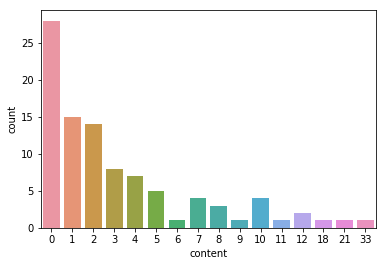

In [59]:
sns.countplot(articles_per_month)

In [90]:
btc_prices.index[0]

Timestamp('2013-04-28 00:00:00')

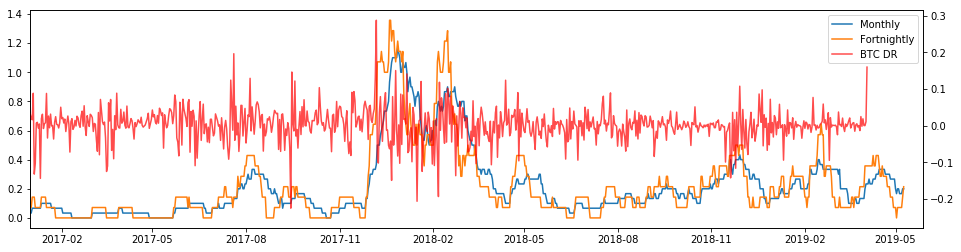

In [170]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,4)
start_date = pd.to_datetime('2017-01-01 00:00:00')
stop_date = pd.to_datetime('2019-05-28 00:00:00')
ax.set_xlim(start_date,stop_date)

line1=ax.plot(articles_per_day.rolling(30).mean(),label='Monthly')
line2=ax.plot(articles_per_day.rolling(14).mean(),label='Fortnightly')

ax2 = ax.twinx()
# line3 = ax2.plot(btc_prices, label='BTC', c = 'red', alpha = 0.7)
# line3 = ax2.plot(vcrix, label='VCRIX', c = 'red', alpha = 0.7)
# line3 = ax2.plot(crix, label='CRIX', c = 'red', alpha = 0.7)
line3 = ax2.plot(btc_log_ret, label='BTC DR', c = 'red', alpha = 0.7)



# #make a shared legend for both subplots
lines = line1+line2+line3
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, handlelength=2, loc=0)

plt.savefig('plots/N_BBC_articles_BTC_dr.png', dpi=150, transparent=True)
plt.show()

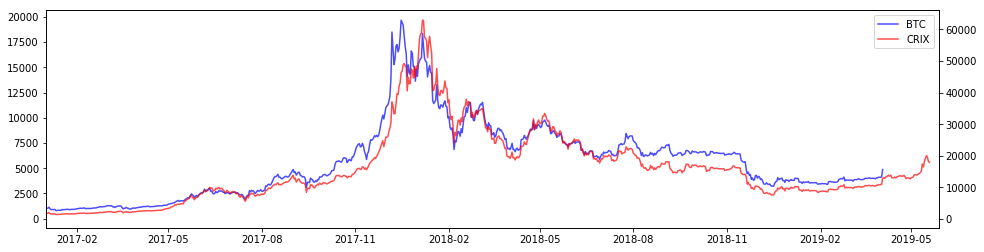

In [174]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,4)
start_date = pd.to_datetime('2017-01-01 00:00:00')
stop_date = pd.to_datetime('2019-05-28 00:00:00')
ax.set_xlim(start_date,stop_date)

line1=ax.plot(btc_prices, label='BTC', c = 'blue', alpha = 0.7)

ax2 = ax.twinx()
# line3 = ax2.plot(btc_prices, label='BTC', c = 'red', alpha = 0.7)
# line3 = ax2.plot(vcrix, label='VCRIX', c = 'red', alpha = 0.7)
line3 = ax2.plot(crix, label='CRIX', c = 'red', alpha = 0.7)
# line3 = ax2.plot(btc_log_ret, label='BTC DR', c = 'red', alpha = 0.7)



# #make a shared legend for both subplots
lines = line1+line3
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, handlelength=2, loc=0)

plt.savefig('plots/CRIX_BTC.png', dpi=150, transparent=True)
plt.show()

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.3, 0.3)

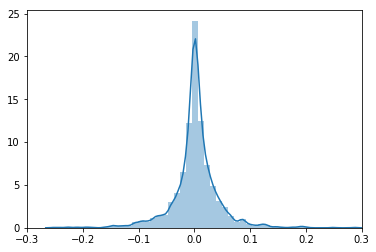

In [166]:
sns.distplot(btc_log_ret.fillna(method='ffill'), bins = 50)
plt.xlim(-0.3,0.3)

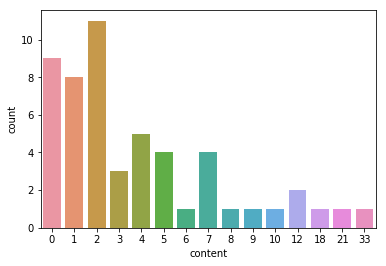

In [125]:
sns.countplot(articles_per_month[articles_per_month.index>'2015'])

TODO: Overlay this with BTC price, CRIX and VCRIX

In [186]:
nyt_df = pd.read_csv('NYT_bitcoin.csv', index_col = 0)
nyt_df.published = pd.to_datetime(nyt_df.published, utc=True)#.dt.tz_localize('UTC')

In [187]:
nyt_articles_per_day = nyt_df.groupby([pd.Grouper(key='published', freq='D')])['content'].count()
nyt_articles_per_week = nyt_df.groupby([pd.Grouper(key='published', freq='W-MON')])['content'].count()
nyt_articles_per_month = nyt_df.groupby([pd.Grouper(key='published', freq='M')])['content'].count()

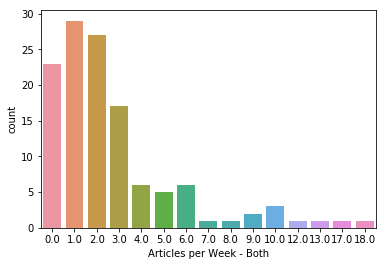

In [229]:
sns.countplot(np.round(articles_per_week[articles_per_week.index>'2017-01-01']+nyt_articles_per_week[nyt_articles_per_week.index>'2017-01-01'],0))
plt.xlabel('Articles per Week - Both')
plt.savefig('Articles_per_week_countplot_both.png', transparent = True, dpi = 150)

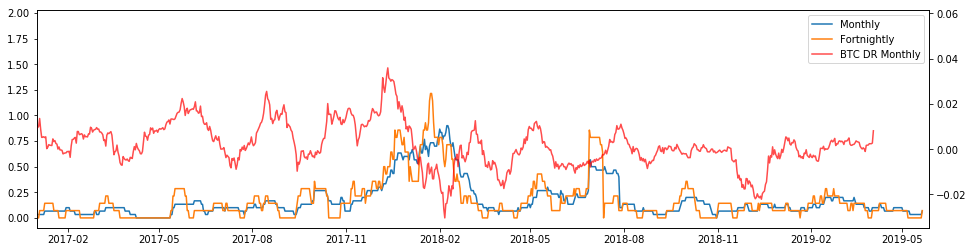

In [247]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,4)
start_date = pd.to_datetime('2017-01-01 00:00:00')
stop_date = pd.to_datetime('2019-05-28 00:00:00')
ax.set_xlim(start_date,stop_date)

line1=ax.plot(nyt_articles_per_day.rolling(30).mean(),label='Monthly')
line2=ax.plot(nyt_articles_per_day.rolling(14).mean(),label='Fortnightly')

ax2 = ax.twinx()
# line3 = ax2.plot(btc_prices, label='BTC', c = 'red', alpha = 0.7)
# line3 = ax2.plot(vcrix, label='VCRIX', c = 'red', alpha = 0.7)
# line3 = ax2.plot(crix, label='CRIX', c = 'red', alpha = 0.7)
# line3 = ax2.plot(btc_log_ret, label='BTC DR', c = 'red', alpha = 0.7)
line3 = ax2.plot(btc_log_ret.rolling(30).mean(), label='BTC DR Monthly', c = 'red', alpha = 0.7)

# #make a shared legend for both subplots
lines = line1+line2+line3
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, handlelength=2, loc=0)

plt.savefig('plots/N_NYT_articles_BTCDR_smoothed.png', dpi=150, transparent=True)
plt.show()

In [213]:
nyt_articles_per_day[(nyt_articles_per_day.index>'2017-11')&(nyt_articles_per_day.index<'2019')].mean()

0.25176470588235295

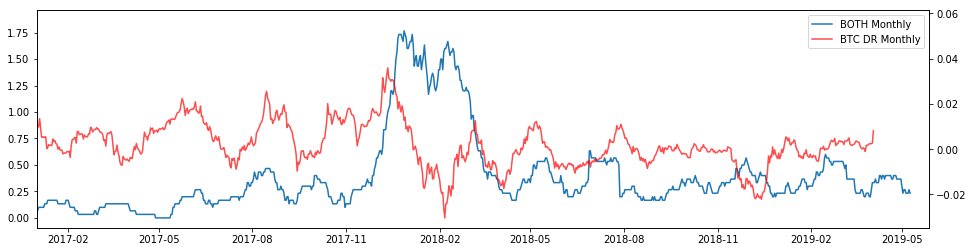

In [248]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,4)
start_date = pd.to_datetime('2017-01-01 00:00:00')
stop_date = pd.to_datetime('2019-05-28 00:00:00')
ax.set_xlim(start_date,stop_date)

# line1=ax.plot(nyt_articles_per_day.rolling(30).mean(),label='NYTMonthly')
# # line2=ax.plot(nyt_articles_per_day.rolling(14).mean(),label='NYTFortnightly')
# line4=ax.plot(articles_per_day.rolling(30).mean(),label='BBCMonthly')
# # line5=ax.plot(articles_per_day.rolling(14).mean(),label='BBCFortnightly')
line1=ax.plot(nyt_articles_per_day.rolling(30).mean()+articles_per_day.rolling(30).mean(),label='BOTH Monthly')


ax2 = ax.twinx()
# line3 = ax2.plot(btc_prices, label='BTC', c = 'red', alpha = 0.7)
# line3 = ax2.plot(vcrix, label='VCRIX', c = 'red', alpha = 0.7)
# line3 = ax2.plot(crix/50, label='CRIX', c = 'green', alpha = 0.7)
line3 = ax2.plot(btc_log_ret.rolling(30).mean(), label='BTC DR Monthly', c = 'red', alpha = 0.7)
# line3 = ax2.plot(btc_log_ret, label='BTC DR', c = 'red', alpha = 0.7)

# #make a shared legend for both subplots
lines = line1+line3#+line4+line5#+line3
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, handlelength=2, loc=0)

plt.savefig('plots/BOTH_sum_month_Smoothed_DR.png', dpi=150, transparent=True)
plt.show()

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


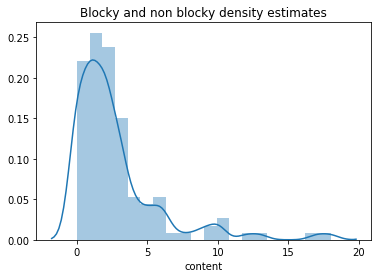

In [245]:
sns.distplot(np.round(articles_per_week[articles_per_week.index>'2017-01-01'] + nyt_articles_per_week[nyt_articles_per_week.index>'2017-01-01'],0).fillna(0), bins=20)
plt.title('Blocky and non blocky density estimates')
plt.savefig('Edgyraphaelhistogram.png', dpi = 120, transparent=True)

In [240]:
df.published.min()

Timestamp('2011-06-21 23:11:04+0000', tz='UTC')

In [241]:
nyt_df.published.min()

Timestamp('2012-01-16 06:01:41+0000', tz='UTC')